# EXPLORATORY DATA ANALYSIS ON EMPLOYEE ABSENTEEISM DATA

## Business Case Study

>This dataset was put together using absenteeism records from a courier company in Brazil from July 2007 to July 2010.

## The Business Task

>In this exercise, I will use exploratory data analysis to determine the likely cause of `Employee Absenteeism` at the company during working hours.

## What is Absenteeism?

> `Absenteeism` at work refers to the habitual or intentional absence of an employee from their workplace, where the absence is often unscheduled and unplanned. It is a measure of the frequency and duration of employees being away from work when they are scheduled to be present. 

## The Problem

>Identifying causes of `Absenteeism` is important to a company's growth and employee management. There is a huge concern about the root causes of absenteeism.
>
>This analysis aims at identifying factors contributing to `Absenteeism`, such as:
>
>* Health issues.
>* Work-related stress.
>* And other personal factors.
>

## Purpose of the EDA

>In this exercise, I will analyze patterns of `Absenteeism`, such as the most common reasons for absence, the distribution of absenteeism durations, and any potential correlations with other features in the dataset.
>
>I will explore questions like:
>
>* What are the most common reasons for employee absenteeism?
>* How does the season or month affect absenteeism?
>* Are there patterns in absenteeism based on certain demographics or characteristics?

### Importing the datasets

In [1]:
# Import all the necessary python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the three datasets

absenteeism_df = pd.read_csv('Absenteeism_at_work.csv', delimiter =',')
compensation_df = pd.read_csv('compensation.csv', delimiter =',')
reasons_df = pd.read_csv('Reasons.csv', delimiter =',')

### Data Transformation

In [3]:
# Absenteeism dataset

absenteeism_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,26.0,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4.0
1,2,NaN,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,NaN
2,3,23.0,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2.0
3,4,7.0,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4.0
4,5,23.0,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2.0


In [4]:
# Checking the data types and information
absenteeism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               697 non-null    float64
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    object 
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
# Checking for missing values
absenteeism_df.isnull().sum()

ID                                  0
Reason for absence                 43
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body mass index                     0
Absenteeism time in hours          44
dtype: int64

In [6]:
# Filling the missing values in 'Reason for absence' column with the mode
absenteeism_df['Reason for absence'].fillna(absenteeism_df['Reason for absence'].mode()[0], inplace=True)

In [7]:
# Filling the missing values in 'Absenteeism time in hours' column with the mean
absenteeism_df['Absenteeism time in hours'].fillna(absenteeism_df['Absenteeism time in hours'].mean(), inplace=True)


In [8]:
# Converting 'Reason for absence' column to integer
absenteeism_df['Reason for absence'] = absenteeism_df['Reason for absence'].astype('int64')

# Converting 'Absenteeism time in hours' column to integer
absenteeism_df['Absenteeism time in hours'] = absenteeism_df['Absenteeism time in hours'].astype('int64')

# Converting 'Disciplinary failure', 'Social smoker'and 'Social drinker' columns to boolean
absenteeism_df['Disciplinary failure'] = absenteeism_df['Disciplinary failure'].astype('bool')
absenteeism_df['Social smoker'] = absenteeism_df['Social smoker'].astype('bool')
absenteeism_df['Social drinker'] = absenteeism_df['Social drinker'].astype('bool')

In [9]:
# Checking the updated data types and missing values
absenteeism_df.info()
absenteeism_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    bool  
 12  Education                        740

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [10]:
absenteeism_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,26,7,3,1,289,36,13,33,"239,554",...,False,1,2,True,False,1,90,172,30,4
1,2,23,7,3,1,118,13,18,50,"239,554",...,True,1,1,True,False,0,98,178,31,7
2,3,23,7,4,1,179,51,18,38,"239,554",...,False,1,0,True,False,0,89,170,31,2
3,4,7,7,5,1,279,5,14,39,"239,554",...,False,1,2,True,True,0,68,168,24,4
4,5,23,7,5,1,289,36,13,33,"239,554",...,False,1,2,True,False,1,90,172,30,2


In [11]:
# Displaying the columns of absenteeism_df

print(absenteeism_df.columns)


Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


In [12]:
# Renaming the columns 

absenteeism_df.columns = absenteeism_df.columns.str.lower().str.replace(' ', '_')

# Checking the updated column names

print(absenteeism_df.columns)


Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day_', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')


In [13]:
# Renaming the 'work_load_average/day_' column

absenteeism_df.rename(columns={'work_load_average/day_': 'workload_average_per_day'}, inplace=True)

# Checking the updated column names

print(absenteeism_df.columns)


Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'workload_average_per_day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')


In [14]:
# Checking the unique values in some columns for potential issues

print("Unique values in 'reason_for_absence':", absenteeism_df['reason_for_absence'].unique())
print("Unique values in 'month_of_absence':", absenteeism_df['month_of_absence'].unique())
print("Unique values in 'day_of_the_week':", absenteeism_df['day_of_the_week'].unique())
print("Unique values in 'seasons':", absenteeism_df['seasons'].unique())
print("Unique values in 'disciplinary_failure':", absenteeism_df['disciplinary_failure'].unique())
print("Unique values in 'education':", absenteeism_df['education'].unique())
print("Unique values in 'social_drinker':", absenteeism_df['social_drinker'].unique())
print("Unique values in 'social_smoker':", absenteeism_df['social_smoker'].unique())
print("Unique values in 'workload_average_per_day':", absenteeism_df['workload_average_per_day'].unique())

Unique values in 'reason_for_absence': [26 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15  4
  3  2 16]
Unique values in 'month_of_absence': [ 7  8  9 10 11 12  1  2  3  4  5  6  0]
Unique values in 'day_of_the_week': [3 4 5 6 2]
Unique values in 'seasons': [1 4 2 3]
Unique values in 'disciplinary_failure': [False  True]
Unique values in 'education': [1 3 2 4]
Unique values in 'social_drinker': [ True False]
Unique values in 'social_smoker': [False  True]
Unique values in 'workload_average_per_day': ['239,554' '205,917' '241,476' '253,465' '306,345' '261,306' '308,593'
 '302,585' '343,253' '326,452' '378,884' '377,550' '275,312' '265,615'
 '294,217' '265,017' '284,031' '236,629' '330,061' '251,818' '244,387'
 '239,409' '246,074' '253,957' '230,290' '249,797' '261,756' '284,853'
 '268,519' '280,549' '313,532' '264,249' '222,196' '246,288' '237,656'
 '275,089' '264,604' '271,219']


In [15]:
# Calculating the median of the 'month_of_absence' column excluding the invalid value (0)

median_month = absenteeism_df['month_of_absence'][absenteeism_df['month_of_absence'] != 0].median()

# Replacing the invalid value (0) with the median

absenteeism_df['month_of_absence'].replace(0, median_month, inplace=True)

# Displaying the unique values in 'month_of_absence' after replacement

print("Unique values in 'month_of_absence':", absenteeism_df['month_of_absence'].unique())


Unique values in 'month_of_absence': [ 7  8  9 10 11 12  1  2  3  4  5  6]


In [16]:
# Checking for duplicates

print(absenteeism_df.duplicated().sum())

0


In [17]:
# Checking for summary statistics

absenteeism_df.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,hit_target,education,son,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,370.500000,20.552703,6.348649,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,1.291892,1.018919,0.745946,79.035135,172.114865,26.677027,7.340541
std,213.763888,6.977147,3.412555,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,0.673238,1.098489,1.318258,12.883211,6.034995,4.285452,13.216946
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,1.000000,0.000000,0.000000,56.000000,163.000000,19.000000,1.000000
25%,185.750000,14.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,1.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,370.500000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,1.000000,1.000000,0.000000,83.000000,170.000000,25.000000,4.000000
75%,555.250000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,1.000000,2.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,740.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,4.000000,4.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [18]:
print(absenteeism_df['workload_average_per_day'].describe())

count         740
unique         38
top       222,196
freq           36
Name: workload_average_per_day, dtype: object


In [19]:
# Calculating percentages for 'Social Smoker'
social_smoker_percentage = (absenteeism_df['social_smoker'].value_counts(normalize=True) * 100).round(2)

# Calculating percentages for 'Social Drinker'
social_drinker_percentage = (absenteeism_df['social_drinker'].value_counts(normalize=True) * 100).round(2)

# Calculating percentages for 'Disciplinary Failure'
disciplinary_failure_percentage = (absenteeism_df['disciplinary_failure'].value_counts(normalize=True) * 100).round(2)

# Displaying the results
print("Social Smoker:")
print(social_smoker_percentage)
print("\nSocial Drinker:")
print(social_drinker_percentage)
print("\nDisciplinary Failure:")
print(disciplinary_failure_percentage)

Social Smoker:
False    92.7
True      7.3
Name: social_smoker, dtype: float64

Social Drinker:
True     56.76
False    43.24
Name: social_drinker, dtype: float64

Disciplinary Failure:
False    94.59
True      5.41
Name: disciplinary_failure, dtype: float64


>#### Summary
>
>1. The `Reason for absence` range from 1 to 28 and the reasons are listed in the reasons_df dataset, it has a mean of approximately 20.55. The distribution has a standard deviation of approximately 6.98, indicating moderate variability.
>2. The `Month of absence` range from 1 to 12 which indicates 'January - December'. The mean month of absence is approximately 6.35, with a standard deviation of approximately 3.41.
>3. The mean `Transportation expense` of approximately 221.33 suggests that, on average, employees have this amount of expense. However, the relatively high standard deviation of approximately 66.95 indicates that there is notable variability among employees' transportation expenses.
>4. The mean `Absenteeism time` of approximately 7.34 hours suggests that, on average, employees in the dataset experience this duration of absenteeism. However, the right-skewed distribution and the relatively high standard deviation of approximately 13.22 indicate that there are instances of longer absenteeism periods, contributing to the skewness. The fact that the data is right-skewed with a maximum value of 120 hours implies that while the majority of instances may have relatively short absenteeism durations, there are cases where employees have been absent for much longer periods.
>5.The average `Day of the week` when absenteeism occurred is around Wednesday (approximately 3.91), with a variation of about 1.42 days. The values are coded from 2 (Monday) to 6 (Friday).
>6. The `Seasons` column indicates the season of the year during which the absenteeism took place. The mean season is around 2.54, with a standard deviation of approximately 1.11. The seasons are coded from 1 to 4, representing summer (1), autumn (2), winter (3)and spring (4).
>7.The `Son` column represents the number of children an employee has. The average is about 1.29 children that employees have, with a standard deviation of 0.67. The range of the number of sons is from 0 to 4.
>8. The `Pet` column signifies the number of pets an employee has. On average, employees have around 0.75 pets, with a standard deviation of approximately 1.10. The range is from 0 to 8 pets.
>9. The `Education` column indicates the level of education of employees. The average education level is around 1.02, with a standard deviation of about 1.10. The education levels are coded from 1 to 4, representing high school (1), graduate (2), postgraduate (3), and  master and doctor (4).
>10. The `Age` column has an average of approximately 36.45, with a standard deviation of 6.48. The age of the employees ranges from 27 to 58.
>11. For the `Weight` column, employees weigh around 79.04 kg on an average, with a standard deviation of approximately 12.88. Weights range from 56 kg to 108 kg.
>12. The average `Height` is approximately 172.11 cm, with a standard deviation of 6.03. Heights range from 163 cm to 196 cm.
>13. The `Hit Target` column indicates the target that employees are expected to achieve in percentage. On average, the hit target is around 94.59, with a standard deviation of 3.78. The hit target range from 81 to 100.
>14.The `Workload average per day` column contains a variety values, with "222,196" being the most prevalent, occurring 36 times among the 740 entries.
>15. The majority of the employees which values at 92.7% in the `Social smoker` column are  "False", while a smaller percentage 7.3% are labeled as "True."
>16. A little more than half of the employees which values at 56.76% in the `Social drinker` column are labeled as "True", while the remaining portion 43.24% is labeled as "False."
>17. About 94.59% in the `Disciplinary failure` column are  "False", indicating that a large proportion of individuals did not experience disciplinary failure. Conversely, a relatively small percentage of 5.41% are labeled as "True," representing cases where disciplinary failure occurred.


In [20]:
# Reasons dataset

reasons_df.head()

,Number,Reason
0,1,Certain infectious and parasitic diseases
1,2,Neoplasms
2,3,Diseases of the blood and blood-forming organs...
3,4,"Endocrine, nutritional and metabolic diseases"
4,5,Mental and behavioural disorders


In [21]:
reasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Number  28 non-null     int64 
 1   Reason  28 non-null     object
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


In [22]:
# Checking for missing values

print(reasons_df.isnull().sum())

Number    0
Reason    0
dtype: int64


In [23]:
# Checking for duplicates

print(reasons_df.duplicated().sum())

0


In [24]:
# Displaying the columns

print(reasons_df.columns)

Index(['Number', 'Reason'], dtype='object')


In [25]:
# Renaming the columns 

reasons_df.columns = reasons_df.columns.str.lower().str.replace(' ', '_')

# Checkong the updated column names

print(reasons_df.columns)

Index(['number', 'reason'], dtype='object')


In [26]:
# Checking the unique values in the 'Reason'column

print("Unique values in 'reason':", reasons_df['reason'].unique())

Unique values in 'reason': ['Certain infectious and parasitic diseases' 'Neoplasms'
 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism'
 'Endocrine, nutritional and metabolic diseases'
 'Mental and behavioural disorders' 'Diseases of the nervous system'
 'Diseases of the eye and adnexa'
 'Diseases of the ear and mastoid process'
 'Diseases of the circulatory system' 'Diseases of the respiratory system'
 'Diseases of the digestive system'
 'Diseases of the skin and subcutaneous tissue'
 'Diseases of the musculoskeletal system and connective tissue'
 'Diseases of the genitourinary system'
 'Pregnancy, childbirth and the puerperium'
 'Certain conditions originating in the perinatal period'
 'Congenital malformations, deformations and chromosomal abnormalities'
 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified'
 'Injury, poisoning and certain other consequences of external causes'
 'External causes o

In [27]:
# Checking the summary statistics

print(reasons_df['reason'].describe())

count                                            28
unique                                           28
top       Certain infectious and parasitic diseases
freq                                              1
Name: reason, dtype: object


>There are 28 unique reasons, and `"Certain infectious and parasitic diseases"` is the most frequently occurring reason.

In [28]:
# Compensation dataset

compensation_df.head()

,ID,comp/hr
0,1,35
1,2,49
2,3,47
3,4,51
4,5,25


In [29]:
compensation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       740 non-null    int64
 1   comp/hr  740 non-null    int64
dtypes: int64(2)
memory usage: 11.7 KB


In [30]:
# Checking for missing values

print(compensation_df.isnull().sum())

ID         0
comp/hr    0
dtype: int64


In [31]:
# Checking for duplicates

print(compensation_df.duplicated().sum())

0


In [32]:
# Displaying the columns

print(compensation_df.columns)

Index(['ID', 'comp/hr'], dtype='object')


In [33]:
# Renameing the 'comp/hr' column

compensation_df.rename(columns={'comp/hr': 'compensation_per_hr'}, inplace=True)

In [34]:
# Renaming the columns 

compensation_df.columns = compensation_df.columns.str.lower().str.replace(' ', '_')

# Checking the updated column names

print(compensation_df.columns)

Index(['id', 'compensation_per_hr'], dtype='object')


In [35]:
compensation_df.describe()

,id,compensation_per_hr
count,740.000000,740.000000
mean,370.500000,38.828378
std,213.763888,9.646331
min,1.000000,22.000000
25%,185.750000,31.000000
50%,370.500000,39.000000
75%,555.250000,47.000000
max,740.000000,55.000000


>This contains 740 unique IDs, with a mean `Compensation per hour` of approximately 38.83 and a standard deviation of 9.65. The compensation values range from 22 to 55 per hour for all employees, with the median value at 39.00. 

### Merging all datasets

In [36]:
# Merging absenteeism_df and compensation_df on 'id' columns
merged_df = pd.merge(absenteeism_df, compensation_df, on='id', how='inner')

# Merging with reasons_df on 'reason_for_absence' and 'number' columns
merged_df = pd.merge(merged_df, reasons_df, left_on='reason_for_absence', right_on='number', how='inner')

# Dropping the redundant columns after merging
merged_df = merged_df.drop(['number'], axis=1)

In [37]:
# Displaying all columns of the merged DataFrame

pd.set_option('display.max_columns', None)
merged_df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,workload_average_per_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,compensation_per_hr,reason
0,1,26,7,3,1,289,36,13,33,"239,554",97,False,1,2,True,False,1,90,172,30,4,35,unjustified absence
1,78,26,10,4,4,289,36,13,33,"253,465",93,False,1,2,True,False,1,90,172,30,8,47,unjustified absence
2,102,26,12,4,4,235,11,14,37,"261,306",97,False,3,1,False,False,1,88,172,29,8,22,unjustified absence
3,104,26,12,6,4,260,50,11,36,"261,306",97,False,1,4,True,False,0,65,168,23,8,52,unjustified absence
4,167,26,3,2,2,260,50,11,36,"343,253",95,False,1,4,True,False,0,65,168,23,16,43,unjustified absence


In [38]:
# Displaying the last rows of the merged DataFrame

pd.set_option('display.max_columns', None)
merged_df.tail()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,workload_average_per_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,compensation_per_hr,reason
735,365,3,1,4,2,291,31,12,40,"330,061",100,False,1,1,True,False,1,73,171,25,8,33,Diseases of the blood and blood-forming organs...
736,535,2,11,4,4,330,16,4,28,"268,519",93,False,2,0,False,False,0,84,182,25,24,33,Neoplasms
737,662,16,4,3,3,179,22,17,40,"246,288",91,False,2,2,False,True,0,63,170,22,2,41,Certain conditions originating in the perinata...
738,669,16,4,3,3,235,16,8,32,"246,288",91,False,3,0,False,False,0,75,178,25,3,32,Certain conditions originating in the perinata...
739,692,16,5,6,3,179,22,17,40,"237,656",99,False,2,2,False,True,0,63,170,22,1,42,Certain conditions originating in the perinata...


In [42]:
# Sorting the merged_df based on the "id" column
merged_df.sort_values(by='id', inplace=True)

merged_df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,workload_average_per_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,compensation_per_hr,reason
0,1,26,7,3,1,289,36,13,33,"239,554",97,False,1,2,True,False,1,90,172,30,4,35,unjustified absence
33,2,23,7,3,1,118,13,18,50,"239,554",97,True,1,1,True,False,0,98,178,31,7,49,medical consultation
34,3,23,7,4,1,179,51,18,38,"239,554",97,False,1,0,True,False,0,89,170,31,2,47,medical consultation
225,4,7,7,5,1,279,5,14,39,"239,554",97,False,1,2,True,True,0,68,168,24,4,51,Diseases of the eye and adnexa
35,5,23,7,5,1,289,36,13,33,"239,554",97,False,1,2,True,False,1,90,172,30,2,25,medical consultation


### Exploratory Analysis

##### What is the total absenteeism hours?

In [43]:
#Summing the absenteeism hours

total_absenteeism_hours = merged_df['absenteeism_time_in_hours'].sum()
print(f'Total Absenteeism Hours: {total_absenteeism_hours} hours')

Total Absenteeism Hours: 5432 hours


The total number of hours that employees were `absent` at the company is `5432 hours`

##### What is the most common reason for employee absenteeism?

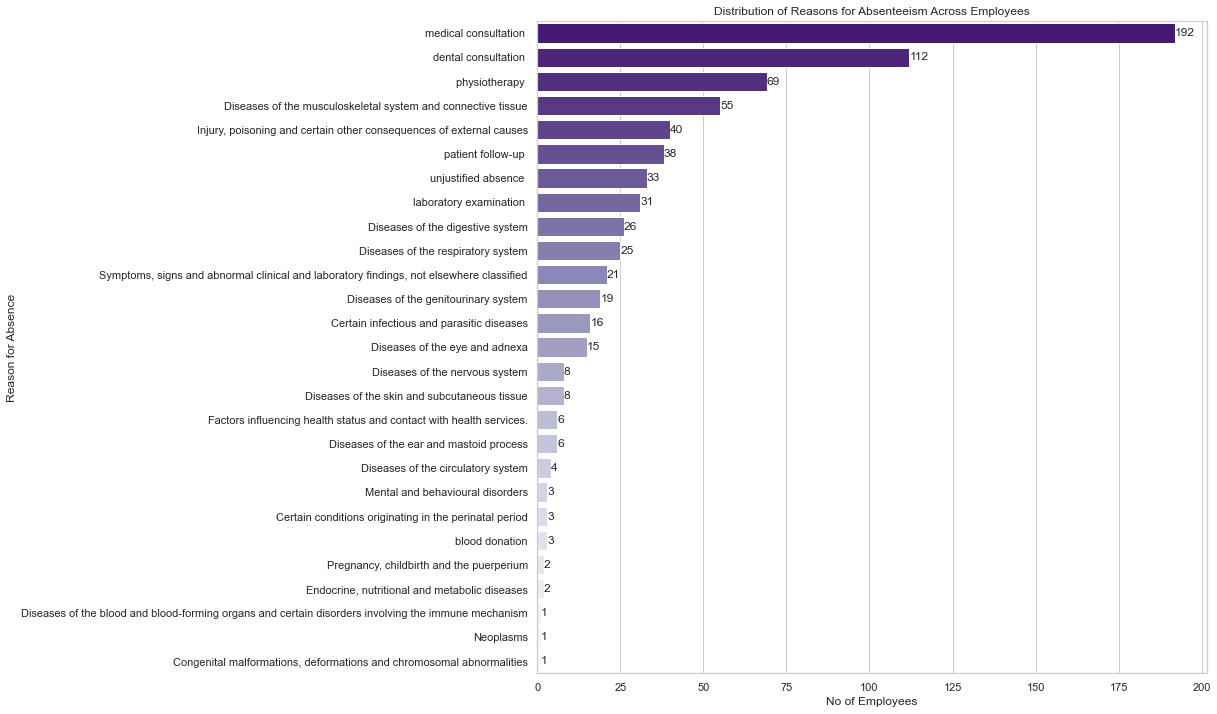

In [44]:
# How many times did each reason for employee absenteeism occur?

reason_counts = merged_df['reason'].value_counts()

sns.set(style="whitegrid")

# Creating a bar plot
plt.figure(figsize=(12, 12))
colors = sns.color_palette("Purples", n_colors=len(reason_counts))[::-1]
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette=colors)

# Setting the text labels
for i, value in enumerate(reason_counts.values):
    plt.text(value, i, f'{value}', ha='left', va='center', fontsize=12)
    
# Customizing the plot
plt.xlabel('No of Employees')
plt.ylabel('Reason for Absence')
plt.title('Distribution of Reasons for Absenteeism Across Employees')

plt.show()

>The most frequently cited reason for employee absenteeism is `'Medical Consultation'`, with a total of `192` occurrences, indicating that this reason has the highest prevalence among employees who were absent.

#### What are the top 5 reasons with the highest absenteeism time?

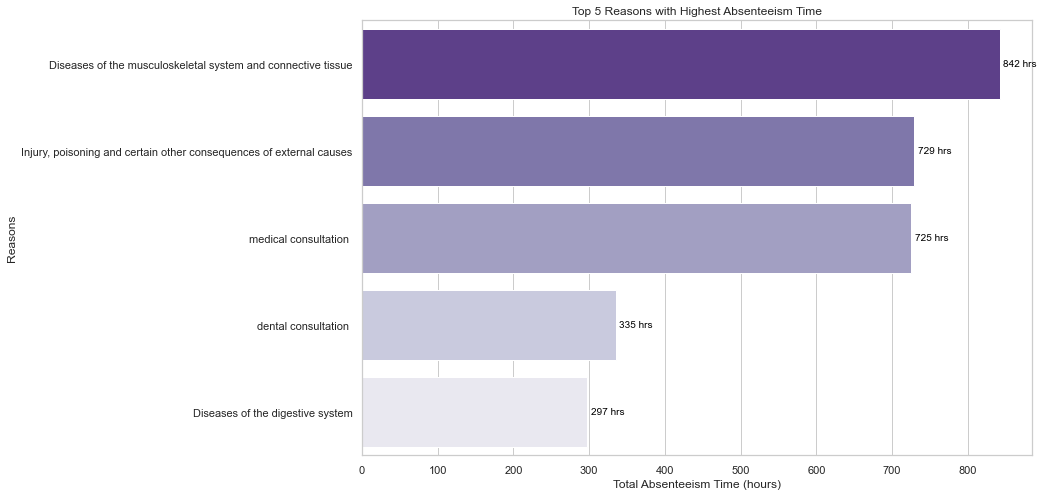

In [47]:
# Grouping by reason and calculating the total absenteeism time
reason_absenteeism = merged_df.groupby('reason')['absenteeism_time_in_hours'].sum()

# Selecting the top 5 reasons with the highest absenteeism time
top5_reasons = reason_absenteeism.nlargest(5)

sns.set(style="whitegrid")

# Creating a bar plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Purples", n_colors=len(top5_reasons))[::-1]
barplot = sns.barplot(x=top5_reasons.values, y=top5_reasons.index, palette=colors)

# Adding the text labels
for i, value in enumerate(top5_reasons.values):
    plt.text(value + 5, i, f'{value:.0f} hrs', va='center', fontsize=10, color='black')

# Customizing the plot
plt.title('Top 5 Reasons with Highest Absenteeism Time')
plt.xlabel('Total Absenteeism Time (hours)')
plt.ylabel('Reasons')


plt.show()


>Among the various reasons for absenteeism, `'Diseases of the musculoskeletal system and connective tissue'` emerged as the top contributor, with a substantial absenteeism time of `842 hours`. Following closely, 'Injury, poisoning, and certain other consequences of external causes' recorded 729 hours of absenteeism, while 'Medical Consultation' ranked third with 725 hours. 
>
>The high absenteeism hours due to 'Disease of Musculoskeletal System and Connective Tissue' among employees in this courier company could be connected to the physically demanding and `injury-prone nature of their work`. Dispatch riders often face challenges such as prolonged periods of riding, exposure to vibrations, navigating through traffic, and handling packages, which collectively increase the risk of musculoskeletal strains and injuries.
>
>The nature of their work also involves `repetitive motions`, `exposure to external elements`, and the `potential for accidents`, contributing to health issues related to the musculoskeletal system and injuries.
>
>To address this, the company might consider implementing measures to enhance employee well-being, such as `ergonomic improvements`, `health and safety programs`, or `periodic health check-ups`. Additionally, providing adequate support and resources for employees in such physically demanding roles could contribute to a healthier and more productive work environment.
>

#### What effects does season, month and day of the week have on employee absenteeism?

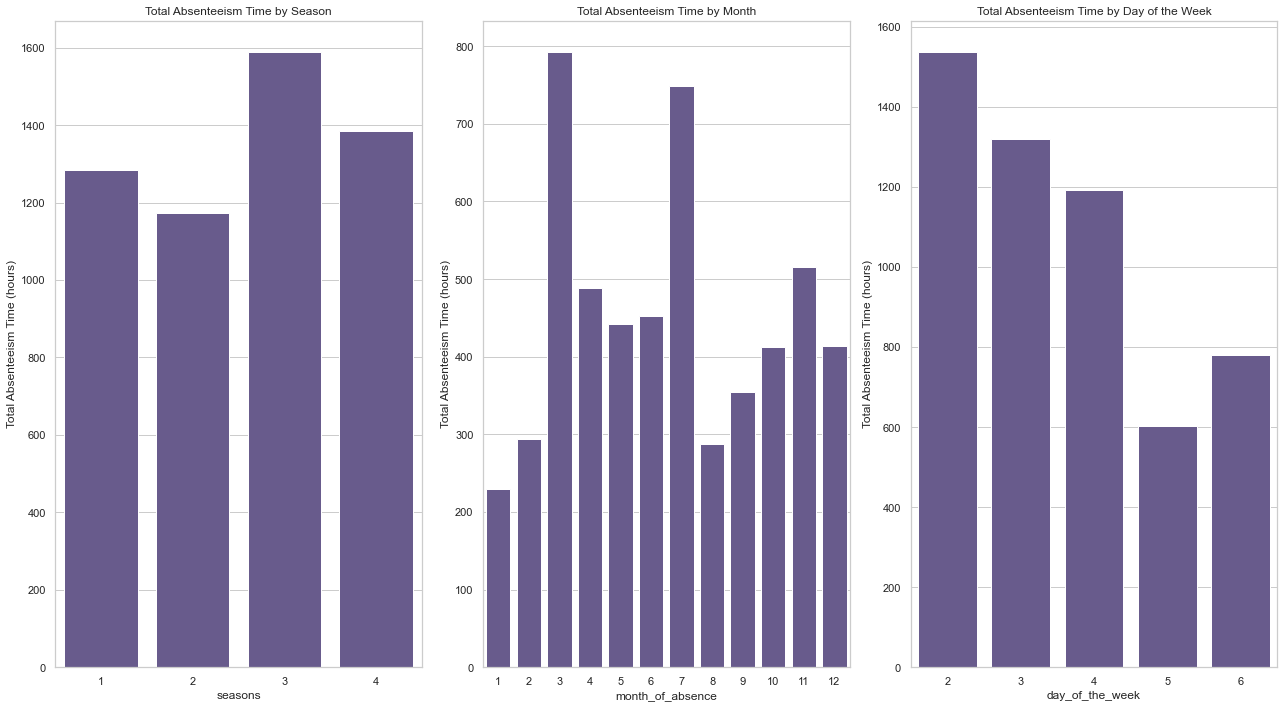

In [51]:
# Grouping by season, month, and day of the week and calculating the total absenteeism time
grouped_season = merged_df.groupby('seasons')['absenteeism_time_in_hours'].sum().reset_index()
grouped_month = merged_df.groupby('month_of_absence')['absenteeism_time_in_hours'].sum().reset_index()
grouped_day = merged_df.groupby('day_of_the_week')['absenteeism_time_in_hours'].sum().reset_index()

#Setting the plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
plot_color = '#645394'

# Plotting seasons
sns.barplot(x='seasons', y='absenteeism_time_in_hours', data=grouped_season, ax=axes[0], color=plot_color)
axes[0].set_title('Total Absenteeism Time by Season')

# Plotting month_of absence
sns.barplot(x='month_of_absence', y='absenteeism_time_in_hours', data=grouped_month, ax=axes[1], color=plot_color)
axes[1].set_title('Total Absenteeism Time by Month')

# Plotting day_of_the_week
sns.barplot(x='day_of_the_week', y='absenteeism_time_in_hours', data=grouped_day, ax=axes[2], color=plot_color)
axes[2].set_title('Total Absenteeism Time by Day of the Week')

# Setting a common y-axis label
for ax in axes:
    ax.set_ylabel('Total Absenteeism Time (hours)')

plt.tight_layout()
plt.show()

##### What effect does seasons have on employee absenteeism?

>The seasons represents the following; Summer (1), Autumn (2), Winter (3), and Spring (4).
>
>From the visualization, it is evident that `Winter` records the highest absenteeism time among employees. This could be attributed to various factors, including weather conditions, potential health issues associated with winter, or increased workload during the winter season. The employees are dispatch riders and the nature of this work might be affected by seasonal variations, with winter possibly posing more challenges for transportation and delivery services.
>
>On the other hand, `Autumn` exhibits the lowest absenteeism time. This might be because the transition from summer to autumn is relatively stable, and employees could experience fewer disruptions or health issues during this season.

##### What effect does month of absence have on employee absenteeism?

>Month of absence are from January (1) to December (12). The month with the highest absenteeism time is `March`, closely followed by `July`. Potential explanations for these peaks could include increased workload, specific projects, or external factors that affect employees during these months. It's essential to investigate whether there are recurring events or patterns contributing to higher absenteeism during these specific months.
>
>Conversely, `January` has the lowest absenteeism time. This could be related to a fresh start in the new year, with employees generally being more present and engaged.
>


##### What effect does day of the week have on employee absenteeism?

>Days are represented as Monday (2) to Friday (6). `Monday` stands out as the day with the highest absenteeism time. This could be attributed to the "Monday blues" phenomenon, where employees might experience higher stress levels or challenges returning to work after the weekend. Employers may want to consider implementing strategies to improve employee morale at the start of the week.
>
>Surprisingly, `Thursday` records the lowest absenteeism time. 
>
>These findings provide valuable insights into the patterns of absenteeism, allowing the company to consider targeted interventions or adjustments in management strategies.

#### What is the correlation between various employee demographics and absenteeism time?

In [52]:
# Selecting the relevant columns for the correlation analysis
correlation_columns = ['age', 'body_mass_index','social_smoker','social_drinker','workload_average_per_day', 'son', 'pet', 'transportation_expense', 'distance_from_residence_to_work', 'absenteeism_time_in_hours']

# Creating a correlation matrix
correlation_matrix = merged_df[correlation_columns].corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                      age  body_mass_index  social_smoker  \
age                              1.000000         0.470688       0.121738   
body_mass_index                  0.470688         1.000000      -0.196006   
social_smoker                    0.121738        -0.196006       1.000000   
social_drinker                   0.213183         0.323978      -0.111678   
son                              0.056984        -0.144150       0.156088   
pet                             -0.231226        -0.076103       0.105379   
transportation_expense          -0.227542        -0.136517       0.044356   
distance_from_residence_to_work -0.145886         0.113772      -0.075369   
absenteeism_time_in_hours        0.081393        -0.038072       0.004174   

                                 social_drinker       son       pet  \
age                                    0.213183  0.056984 -0.231226   
body_mass_index                        0.323978 -0.144150 -0.076103

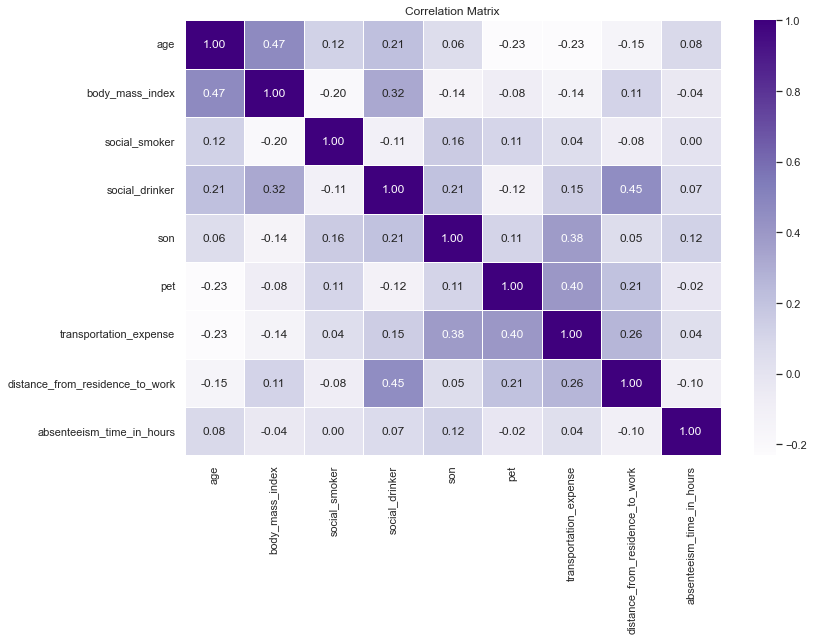

In [53]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

>
>This is a correlation matrix that shows the correlation coefficients between some variables in this analysis. Each cell in the matrix represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1:
>
>1. 1: Perfect positive correlation
>2. 0: No correlation
>3. -1: Perfect negative correlation
>
>Here's an interpretation of some key employee demographics and their correlation with the absenteeism time:
>
>* There is a very `weak positive correlation` between `age and absenteeism time`, indicating almost no relationship.
>
>* There is a very `weak negative correlation` between `body mass index and absenteeism time`, indicating almost no relationship.
>
>* There is almost `no correlation` between being `social smoker and absenteeism time`.
>
>* There is a very `weak positive correlation` between being a `social drinker and absenteeism time`, indicating almost no relationship.
>
>* There is a `weak positive correlation` between the employee's number of children `(son) and absenteeism time`, suggesting a slight tendency for individuals with more children to have higher absenteeism time.
>
>* There is almost `no correlation` between the employee's number of `pets and absenteeism time`.
>
>* There is almost `no correlation` between `transportation expenses of the employees and absenteeism time`.
>
>* There is a `weak negative correlation` between the `distance from residence to work and absenteeism time`, indicating a slight tendency for individuals who live farther from work to have lower absenteeism time.
>

### Conclusion and Recommendations

>This exploratory data analysis reveals that 'Medical Consultation' is the most common reason for absenteeism, while 'Diseases of the musculoskeletal system and connective tissue' contributes significantly to the highest absenteeism hours. The seasonal analysis identifies winter as the peak season for absenteeism, potentially influenced by the physically demanding nature of the courier job. Monthly patterns show higher absenteeism in March and July, possibly tied to increased workload, with January having the lowest absenteeism. Surprisingly, Monday records the highest absenteeism, and Thursday the lowest. Weak correlations suggest age, body mass index, and lifestyle factors have minimal impact on absenteeism, while the number of children (son) shows a slight positive correlation.
>
>* `Health and safety measures` can be implemented to address the high absenteeism due to musculoskeletal issues, by considering ergonomic improvements, regular health check-ups, and safety training to reduce workplace injuries.
>
>* The company can also utilize the impact of seasons on absenteeism and consider `seasonal adjustments in workforce planning`. They can provide additional support and resources during peak seasons, especially in winter.
>
>* The company can also implement strategies to `improve employee morale on Mondays`, such as team-building activities or flexible work arrangements. This could contribute to reducing absenteeism at the start of the week.
>
>These recommendations aim to enhance employee well-being, address specific reasons for absenteeism, and optimize workforce management strategies for the courier company.